In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import random
from scipy.spatial import distance

In [2]:
sys.path.insert(0, '/Users/teissherman/Desktop/GitHub/IndividualProject/Project/OWL2VecStar/lib')
from PreprocessEmbeddings import load_all_Pairs, new_p_dict

In [ ]:
# open embeddings with best performance 
files = ['/Users/teissherman/Desktop/GitHub/IndividualProject/Project/Output/Embeddings/8_R_2_p.pickle',
          '/Users/teissherman/Desktop/GitHub/IndividualProject/Project/Output/Embeddings/opa2vec_p.pickle',
          '/Users/teissherman/Desktop/GitHub/IndividualProject/Project/Output/Embeddings/1_R_2_p.pickle']
protein_embeddings = []
for file in files:
        with open(file, 'rb') as f:
                protein_embedding = pickle.load(f)
                protein_embeddings.append(protein_embedding)

In [90]:
# all positive and negative interactions
df_positive_pairs, df_negative_pairs = load_all_Pairs('/Users/teissherman/Desktop/GitHub/IndividualProject/Project/data/9606.protein.links.v11.5.txt', 
                                '/Users/teissherman/Desktop/GitHub/IndividualProject/Project/data/9606.negative_interactions.txt')

Number of Unique Proteins: 19385


/Users/teissherman/Desktop/GitHub/IndividualProject/Project/OWL2VecStar/lib/PreprocessEmbeddings.py:48: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_positive_pairs.loc[:,'protein1'] = df_positive_pairs.loc[:,'protein1'].str.replace('.','_')
/Users/teissherman/Desktop/GitHub/IndividualProject/Project/OWL2VecStar/lib/PreprocessEmbeddings.py:49: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_positive_pairs.loc[:,'protein2'] = df_positive_pairs.loc[:,'protein2'].str.replace('.','_')


11938498


/Users/teissherman/Desktop/GitHub/IndividualProject/Project/OWL2VecStar/lib/PreprocessEmbeddings.py:56: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_negative_pairs.loc[:,'protein1'] = df_negative_pairs.loc[:,'protein1'].str.replace('.','_')
/Users/teissherman/Desktop/GitHub/IndividualProject/Project/OWL2VecStar/lib/PreprocessEmbeddings.py:57: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_negative_pairs.loc[:,'protein2'] = df_negative_pairs.loc[:,'protein2'].str.replace('.','_')


In [25]:
# calculate euclidean distance for all
pair_emb_8_R_2 = new_p_dict(df_positive_pairs, df_negative_pairs, protein_embeddings[0])
pair_emb_opa2vec = new_p_dict(df_positive_pairs, df_negative_pairs, protein_embeddings[1])
pair_emb_1_R_2 = new_p_dict(df_positive_pairs, df_negative_pairs, protein_embeddings[2])

21621
21621
21621


In [93]:
# calculate euclidean distance for each protein pair, both positive and negative
def calc_distance(pair_embeddings, distance_type):
    distances = {}
    for key,value in pair_embeddings.items():
        length = int(len(value)/2)
        p1 = value[0:length]
        p2 = value[length:]

        if distance_type == 'Euclidean':
            dist = distance.euclidean(p1, p2)
        else:
            dist = distance.cosine(p1,p2)

        # convert key from tuple to list and append to new dict which holds euclidean distances
        key_list = list(key)
        distances[key] = dist

    positive_score = []
    negative_score = []
    for key, value in distances.items():
        if key[2] > 700:
            positive_score.append(distances[key])
        else:
            negative_score.append(distances[key])

    average_positive = sum(positive_score) / len(positive_score)
    average_negative = sum(negative_score) / len(negative_score) 

    return average_positive, average_negative  

In [67]:
average_positive_8_R_2, average_negative_8_R_2 = calc_distance(pair_emb_8_R_2[0], 'Cosine')
average_positive_opa2vec, average_negative_opa2vec = calc_distance(pair_emb_opa2vec[0], 'Cosine')
average_positive_1_R_2, average_negative_1_R_2 = calc_distance(pair_emb_1_R_2[0], 'Cosine')

difference_8_R_2 = average_negative_8_R_2 - average_positive_8_R_2  
difference_opa2vec =  average_negative_opa2vec - average_positive_opa2vec
difference_1_R_2 =  average_negative_1_R_2 - average_positive_1_R_2

Text(0.5, 1.0, 'Cosine Distance between Positive and Negative Interactions')

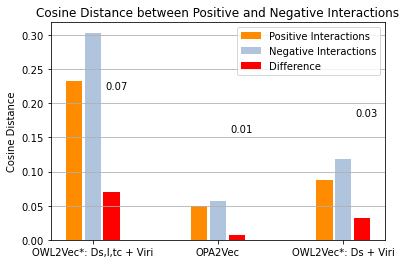

In [69]:
#bar plot for euclidean distance
x_labels = ['OWL2Vec*: Ds,l,tc + Viri', 'OPA2Vec', 'OWL2Vec*: Ds + Viri']
labels = ['Positive Interactions', 'Negative Interactions', 'Difference']

a1 = [average_positive_8_R_2, average_positive_opa2vec, average_positive_1_R_2]
a2 = [average_negative_8_R_2, average_negative_opa2vec, average_negative_1_R_2]
a3 = [difference_8_R_2, difference_opa2vec, difference_1_R_2]

x = np.arange(len(x_labels))
width = 0.13

# plot
plt.bar(x - 0.15, a1, width, label=labels[0], color='darkorange')
plt.bar(x + 0, a2, width, label=labels[1], color='lightsteelblue')
plt.bar(x + 0.15, a3, width, label=labels[2], color='red')

for i,v in enumerate(a3):
    plt.text(i + 0.10, v + 0.15, str(round(v,2)))

plt.xticks(x, x_labels)
# Add some text for labels, title and custom x-axis tick labels, etc.
plt.legend()
plt.gca().yaxis.grid(True)
plt.ylabel('Cosine Distance')
plt.title('Cosine Distance between Positive and Negative Interactions')

In [ ]:
# open pickled files in results and append to dictionary
results_embeddings = {}
filenames = []
for root, dirs, files in os.walk("/Users/teissherman/Desktop/GitHub/IndividualProject/Project/Output/Embeddings/"):
    for file in files:
        # remove .pickle
        name = str(file).replace(".pickle", "")
        filenames.append(name)
        with open(root + file, 'rb') as f:
            loaded_embeddings = pickle.load(f)
            loaded_embeddings = new_p_dict(df_positive_pairs, df_negative_pairs, loaded_embeddings)
        #use pathname as lookup in dictionary
        results_embeddings[name] = loaded_embeddings

In [ ]:
# pickle given size of file / change to euclidean if euclidean
with open('/Users/teissherman/Desktop/GitHub/IndividualProject/Project/Output/CosineExperiment/cosine_results.pickle', 'wb') as f:
    pickle.dump(results_embeddings_cosine, f)

In [ ]:
#pickle given size of file / change to euclidean if euclidean
with open('/Users/teissherman/Desktop/GitHub/IndividualProject/Project/Output/CosineExperiment/euclidean_results.pickle', 'wb') as f:
    pickle.dump(results_embeddings, f)

In [94]:
from collections import defaultdict

# calculate cosine distance
results_distances_e= defaultdict(dict)
for key, value in results_embeddings.items():
    average_positive, average_negative = calc_distance(results_embeddings[key][0], 'euclidean')
    difference = average_negative - average_positive
    results_distances_e[str(key)]['average_positive'] = average_positive
    results_distances_e[str(key)]['average_negative'] = average_negative
    results_distances_e[str(key)]['difference'] = difference
    

In [55]:
# pickle given size of file / change to euclidean if euclidean
with open('/Users/teissherman/Desktop/GitHub/IndividualProject/Project/Output/CosineExperiment/cosine_results.pickle', 'wb') as f:
    pickle.dump(results_distances_cosine, f)

In [95]:
# pickle given size of file / change to euclidean if euclidean
with open('/Users/teissherman/Desktop/GitHub/IndividualProject/Project/Output/CosineExperiment/euclidean_results.pickle', 'wb') as f:
    pickle.dump(results_distances_e, f)

In [31]:
# open results
with open('/Users/teissherman/Desktop/GitHub/IndividualProject/Project/Output/CosineExperiment/cosine_results.pickle', 'rb') as f:
    results_distances = pickle.load(f)

In [4]:
# open ml results auc with correct keys and match
with open('/Users/teissherman/Desktop/GitHub/IndividualProject/Project/Output/CosineExperiment/euclidean_results.pickle', 'rb') as f:
    results_distances_e = pickle.load(f)

In [33]:
# open ml results auc with correct keys and match
with open('/Users/teissherman/Desktop/GitHub/IndividualProject/Project/Output/CosineExperiment/all_auc_scores.pickle', 'rb') as f:
    df_all_results = pickle.load(f)

Cosine Correlation

In [34]:
# calculate cosine correlation to AUC
df_all_results.set_index('Configuration', inplace=True)
df_difference = pd.DataFrame.from_dict(results_distances).T
df_difference = df_difference['difference']
df_difference = pd.DataFrame(df_difference)
df_difference.index = df_difference.index.map(lambda x: str(x)[:-2])

In [35]:
# merge dataframes and plot
df_merged_cosine = df_all_results.join(df_difference)

In [37]:
df_merged_cosine = df_merged_cosine.dropna()

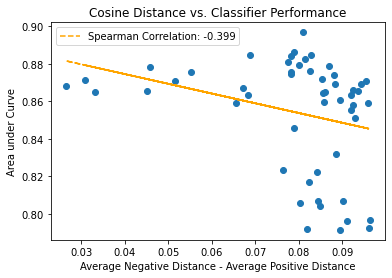

In [68]:
from scipy.stats import spearmanr

# graphical representation of differences in average distance between positive adn engative across embedding method and AUC
x = np.array(df_merged_cosine[df_merged_cosine['variable'] == 'auc_mlp']['difference']).astype('float32')
y = np.array(df_merged_cosine[df_merged_cosine['variable'] == 'auc_mlp']['value']).astype('float32')

# calculate Pearson's correlation for cosine distances
corr_cosine = spearmanr(x, y)

#plot
m, b = np.polyfit(x, y, 1)
plt.scatter(x, y)
plt.plot(x, m*x + b, color='orange', linestyle='dashed', label = 'Spearman Correlation: ' + str(corr_cosine[0].round(3)))
plt.title('Cosine Distance vs. Classifier Performance')
plt.ylabel('Area under Curve')
plt.xlabel('Average Negative Distance - Average Positive Distance')
plt.legend()
plt.show()

In [60]:
corr_cosine[0]

-0.3987022965935285

Euclidean Correlation

In [40]:
# calculate for euclidean distance
#df_all_results.set_index('Configuration', inplace=True)
df_difference_e = pd.DataFrame.from_dict(results_distances_e).T
df_difference_e = df_difference_e['difference']
df_difference_e = pd.DataFrame(df_difference_e)
df_difference_e.index = df_difference_e.index.map(lambda x: str(x)[:-2])

In [41]:
# merge dataframes and plot
df_merged_e = df_all_results.join(df_difference_e)
df_merged_e.dropna(inplace=True)

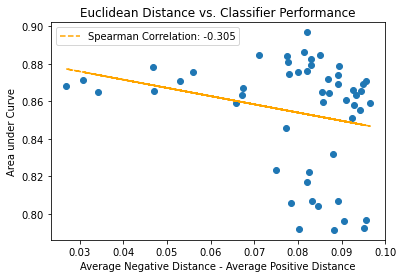

In [67]:
# graphical representation of differences in average distance between positive adn engative across embedding method and AUC
x = np.array(df_merged_e[df_merged_e['variable'] == 'auc_mlp']['difference']).astype('float32')
y = np.array(df_merged_e[df_merged_e['variable'] == 'auc_mlp']['value']).astype('float32')

#correlation
corr_euclidean = spearmanr(x, y)

#plot
m, b = np.polyfit(x, y, 1)
plt.scatter(x, y)
plt.plot(x, m*x + b, color='orange', linestyle='dashed', label = 'Spearman Correlation: ' + str(corr_euclidean[0].round(3)))
plt.title('Euclidean Distance vs. Classifier Performance')
plt.ylabel('Area under Curve')
plt.xlabel('Average Negative Distance - Average Positive Distance')
plt.legend()
plt.show()

In [43]:
from scipy.stats import spearmanr
# calculate Pearson's correlation for cosine distances



SpearmanrResult(correlation=-0.3050456757448988, pvalue=0.027881752144938526)
